In [1]:
import os
os.chdir('../../')

INFO - main.py - 2025-03-31 13:44:39,070 - Using device: cuda
INFO - main.py - 2025-03-31 13:44:39,070 - Using device: cuda
INFO - main.py - 2025-03-31 13:44:39,070 - Using device: cuda
INFO - main.py - 2025-03-31 13:44:39,070 - Using device: cuda


[prepare_model] Model is ready.
/data/data/rbfsolverglq10laggrid/NFE=25,p=3,dataset=IMAGENET64.npy loaded!


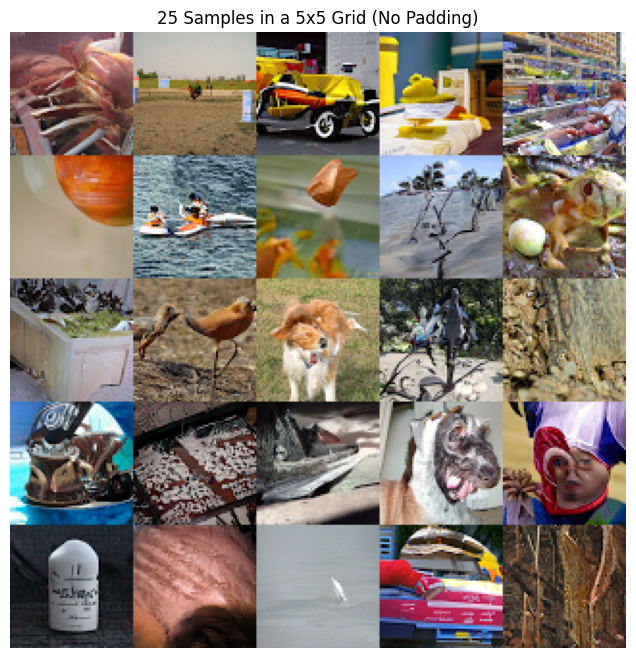

In [14]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import random

from main import parse_args_and_config, Diffusion
from datasets import inverse_data_transform

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

torch.backends.cudnn.deterministic = True
torch.backends.benchmark = False

###############################################################################
# 1) Notebook에서 sys.argv를 직접 설정 (argparse 흉내)
###############################################################################
sys.argv = [
    "main.py",
    "--config", "imagenet64.yml",  # 사용하려는 config
    "--sample",
    "--sample_type", "rbfsolverglq10laggrid",
    "--dpm_solver_type", "data_prediction",
    "--dpm_solver_order", "3",
    "--timesteps", "25",
    "--skip_type", "logSNR",
    "--log_scale_min", "-2.0",
    "--log_scale_max", "3.0",
    "--scale_dir", "/data/data/rbfsolverglq10laggrid",
    "--ni"
]

###############################################################################
# 2) 인자/설정 로드
###############################################################################
args, config = parse_args_and_config()

###############################################################################
# 3) Diffusion 객체 생성 -> 모델 로딩
###############################################################################
diffusion = Diffusion(args, config, rank=0)
diffusion.prepare_model()
diffusion.model.eval()

###############################################################################
# 4) 배치(25장) 한 번에 샘플링 -> 5x5 그리드(여백 없이) 시각화
###############################################################################
device = diffusion.device
num_samples = 25

# (a) 초기 노이즈 (배치 크기 25)
x = np.random.randn(num_samples, config.data.channels, config.data.image_size, config.data.image_size).astype(np.float32)
x = torch.tensor(x, device=device)

# (b) 모델로 샘플링 (배치 입력)
(sampled_x, hist1), _ = diffusion.sample_image(x, diffusion.model)

# (c) [-1,1] → [0,1] 범위 변환
sampled = inverse_data_transform(config, sampled_x)

# (d) 5x5 그리드, padding=0 => 여백 없이
grid = vutils.make_grid(sampled, nrow=5, padding=0)

# (e) matplotlib 시각화
grid_np = grid.permute(1, 2, 0).cpu().numpy()
grid_np = np.clip(grid_np, 0, 1)

plt.figure(figsize=(8,8))
plt.imshow(grid_np)
plt.axis('off')
plt.title("25 Samples in a 5x5 Grid (No Padding)")
plt.show()

/data/data/rbfsolverglq10laggrid/NFE=25,p=3,dataset=IMAGENET64.npy loaded!
Eval x_pred 0
Pred x 0 1
Eval x_pred 1


Corr x 0 1
Pred x 1 2
Eval x_pred 2
Corr x 1 2
Pred x 2 3
Eval x_pred 3
Corr x 2 3
Pred x 3 3
Eval x_pred 4
Corr x 3 3
Pred x 4 3
Eval x_pred 5
Corr x 4 3
Pred x 5 3
Eval x_pred 6
Corr x 5 3
Pred x 6 3
Eval x_pred 7
Corr x 6 3
Pred x 7 3
Eval x_pred 8
Corr x 7 3
Pred x 8 3
Eval x_pred 9
Corr x 8 3
Pred x 9 3
Eval x_pred 10
Corr x 9 3
Pred x 10 3
Eval x_pred 11
Corr x 10 3
Pred x 11 3
Eval x_pred 12
Corr x 11 3
Pred x 12 3
Eval x_pred 13
Corr x 12 3
Pred x 13 3
Eval x_pred 14
Corr x 13 3
Pred x 14 3
Eval x_pred 15
Corr x 14 3
Pred x 15 3
Eval x_pred 16
Corr x 15 3
Pred x 16 3
Eval x_pred 17
Corr x 16 3
Pred x 17 3
Eval x_pred 18
Corr x 17 3
Pred x 18 3
Eval x_pred 19
Corr x 18 3
Pred x 19 3
Eval x_pred 20
Corr x 19 3
Pred x 20 3
Eval x_pred 21
Corr x 20 3
Pred x 21 3
Eval x_pred 22
Corr x 21 3
Pred x 22 3
Eval x_pred 23
Corr x 22 3
Pred x 23 2
Eval x_pred 24
Corr x 23 2
Pred x 24 1


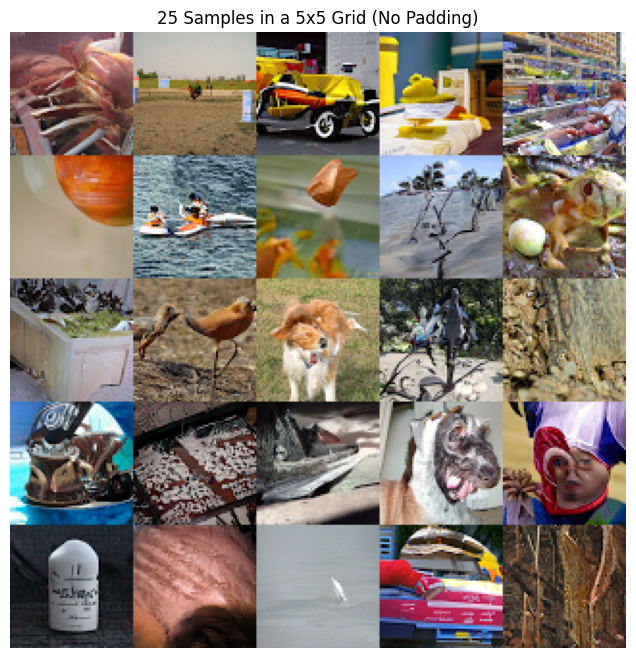

In [15]:
# (b) 모델로 샘플링 (배치 입력)
(sampled_ecp, hist2), _ = diffusion.sample_image(x, diffusion.model, ecp=True)

# (c) [-1,1] → [0,1] 범위 변환
sampled = inverse_data_transform(config, sampled_ecp)

# (d) 5x5 그리드, padding=0 => 여백 없이
grid = vutils.make_grid(sampled, nrow=5, padding=0)

# (e) matplotlib 시각화
grid_np = grid.permute(1, 2, 0).cpu().numpy()
grid_np = np.clip(grid_np, 0, 1)

plt.figure(figsize=(8,8))
plt.imshow(grid_np)
plt.axis('off')
plt.title("25 Samples in a 5x5 Grid (No Padding)")
plt.show()


In [16]:
torch.allclose(sampled_x, sampled_ecp)

True

In [17]:
for i, (h1, h2) in enumerate(zip(hist1, hist2)):
    print(i, torch.allclose(h1, h2))

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True
20 True
21 True
22 True
23 True
24 True
